<div style="text-align: center;">
    <h1>Data Scraping with Python</h1>
</div>

#### In this Python data scraping project, I leverage BeautifulSoup and requests to extract information from web pages efficiently. Through hands-on examples, I explore techniques to gather and analyze data from websites and create useful vizualizations.

#### I chose to scrape the table titled 'List of top international men's football goal scorers by country' from Wikipedia.

<img src="realTable.png" style=width:60000px;height:1200px/>


#### Aquire the table from the wikipedia page and read it into a DataFrame

In [31]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_top_international_men%27s_football_goal_scorers_by_country"

# Send a GET request to fetch the HTML content of the page
response = requests.get(url)
html_content = response.text

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(html_content, "html.parser")

# Find the first table on the page
table = soup.find("table", class_="wikitable")

# Read the table into a DataFrame using Pandas
df = pd.read_html(str(table))[0]

# Write the DataFrame to a CSV file
#df.to_csv("football_goal_scorers2.csv", index=False)


#### Check the table to make sure it is correct

In [32]:
display(df)

,Rank,Player,Country,Goals,Caps,Ratio,First cap,Last cap,Ref.
0,1,Cristiano Ronaldo,Portugal,128,205,0.62,20 August 2003,19 November 2023,[1]
1,2,Ali Daei[a],Iran,108,148,0.73,6 June 1993,21 June 2006,[2]
2,3,Lionel Messi,Argentina,106,180,0.59,17 August 2005,21 November 2023,[3]
3,4,Sunil Chhetri,India,93,148,0.63,12 June 2005,23 January 2024,[4]
4,5,Mokhtar Dahari,Malaysia,89,142,0.63,5 June 1972,19 May 1985,[5]
...,...,...,...,...,...,...,...,...,...
227,205,Liam Walker [i],Gibraltar,5,75,0.07,19 November 2013,21 November 2023,[223]
228,209,Abdullahi Sheikh Mohamed,Somalia,3,6,0.50,19 April 2000,29 November 2005,[224]
229,209,Jamie Browne,U.S. Virgin Islands,3,11,0.27,27 September 2006,14 June 2022,[225]
230,209,J. C. Mack,U.S. Virgin Islands,3,18,0.17,9 September 2018,16 November 2023,[226]


####  Import libraries for vizualizations and analysis

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

#### Many different graphs to vizualize data and to see correlations

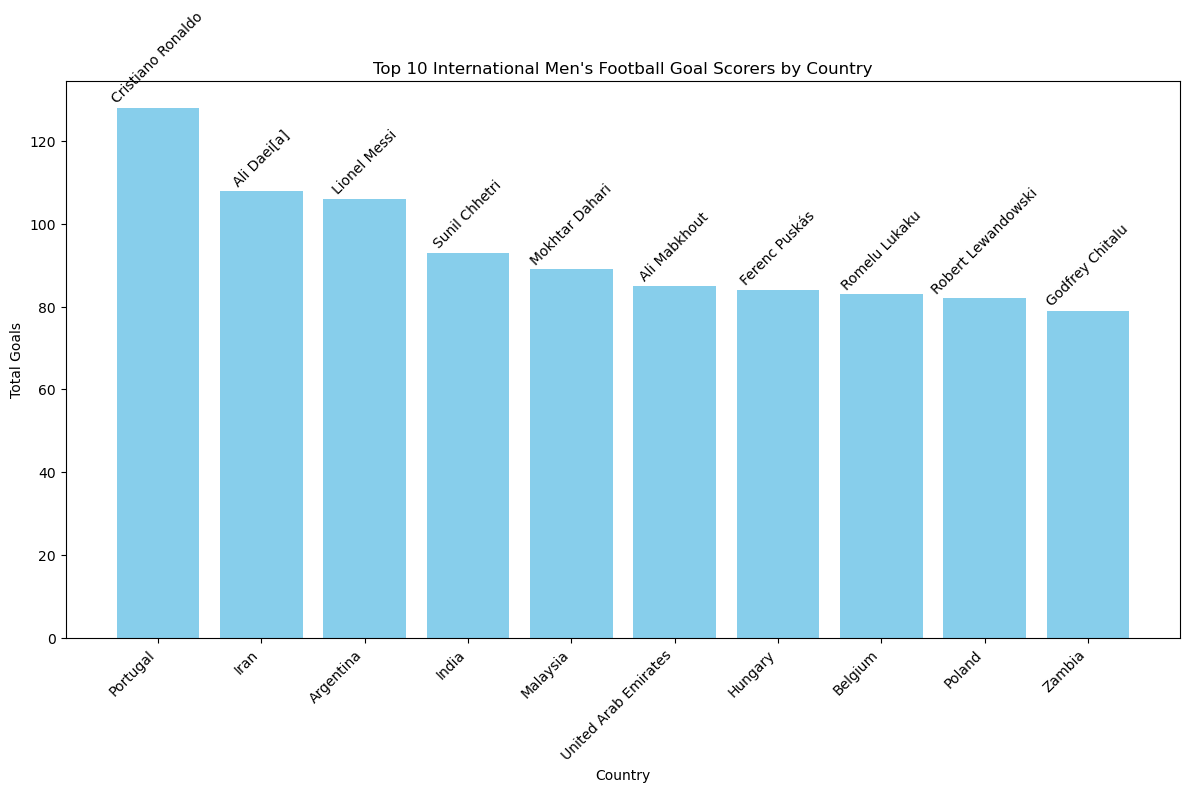

In [34]:
# Select top 10 countries and their corresponding players
top_countries = df.head(10)

# Plot a bar chart of top goal scorers by country
plt.figure(figsize=(12, 8))
bars = plt.bar(top_countries["Country"], top_countries["Goals"], color="skyblue")

# Annotate each bar with player names
for bar, player in zip(bars, top_countries["Player"]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, player,
             ha='center', va='bottom', rotation=45)

plt.xlabel("Country")
plt.ylabel("Total Goals")
plt.title("Top 10 International Men's Football Goal Scorers by Country")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

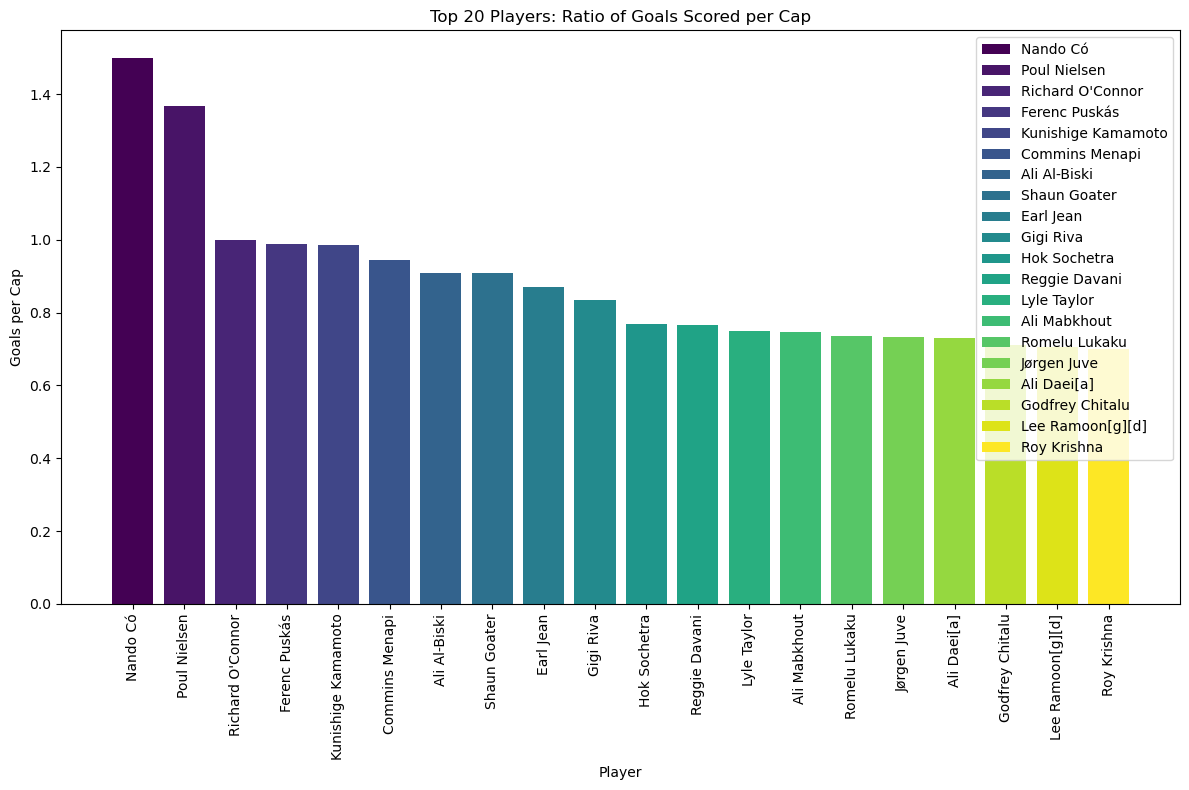

In [36]:
# Calculate the ratio of goals scored per cap
df['Ratio'] = df['Goals'] / df['Caps']

# Sort the DataFrame based on the 'Ratio' column in descending order
df_sorted = df.sort_values(by='Ratio', ascending=False)

# Select only the top 20 players
top_20_players = df_sorted.head(20)

# Define colors for the bars
num_colors = len(top_20_players)
colors = plt.cm.viridis(np.linspace(0, 1, num_colors))  # Use viridis colormap

# Plot a bar chart of ratio for the top 20 players with different colors for each bar
plt.figure(figsize=(12, 8))
bars = plt.bar(top_20_players['Player'], top_20_players['Ratio'], color=colors)

# Add labels and title
plt.xlabel('Player')
plt.ylabel('Goals per Cap')
plt.title('Top 20 Players: Ratio of Goals Scored per Cap')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show color legend
plt.legend(bars, top_20_players['Player'], loc='upper right')

plt.tight_layout()
plt.show()

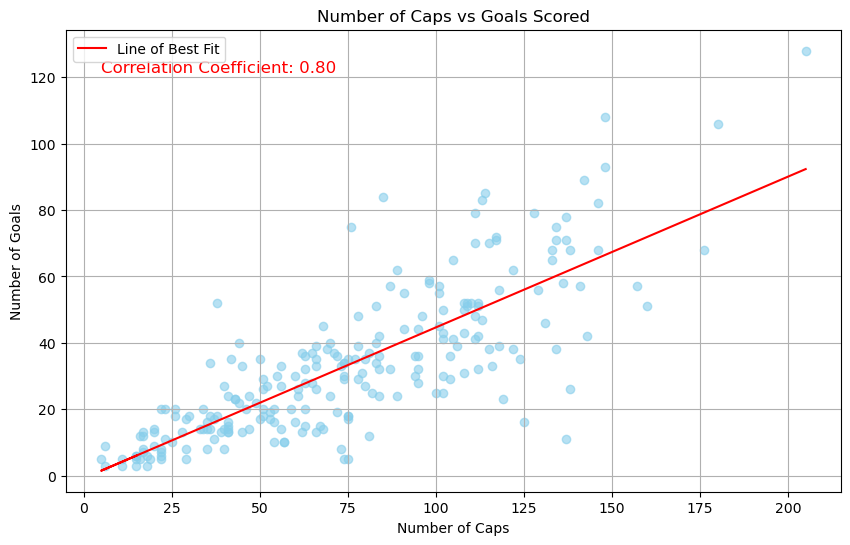

In [37]:
# Plot a scatter plot of Caps vs Goals
plt.figure(figsize=(10, 6))
plt.scatter(df['Caps'], df['Goals'], color='skyblue', alpha=0.6)
plt.title("Number of Caps vs Goals Scored")
plt.xlabel("Number of Caps")
plt.ylabel("Number of Goals")
plt.grid(True)

# Calculate the correlation coefficient
slope, intercept, r_value, p_value, std_err = linregress(df['Caps'], df['Goals'])

# Plot the line of best fit
plt.plot(df['Caps'], slope * df['Caps'] + intercept, color='red', label='Line of Best Fit')

# Add correlation coefficient to the plot
plt.text(df['Caps'].min(), df['Goals'].max() * 0.95, f'Correlation Coefficient: {r_value:.2f}', fontsize=12, color='red')

plt.legend()
plt.show()

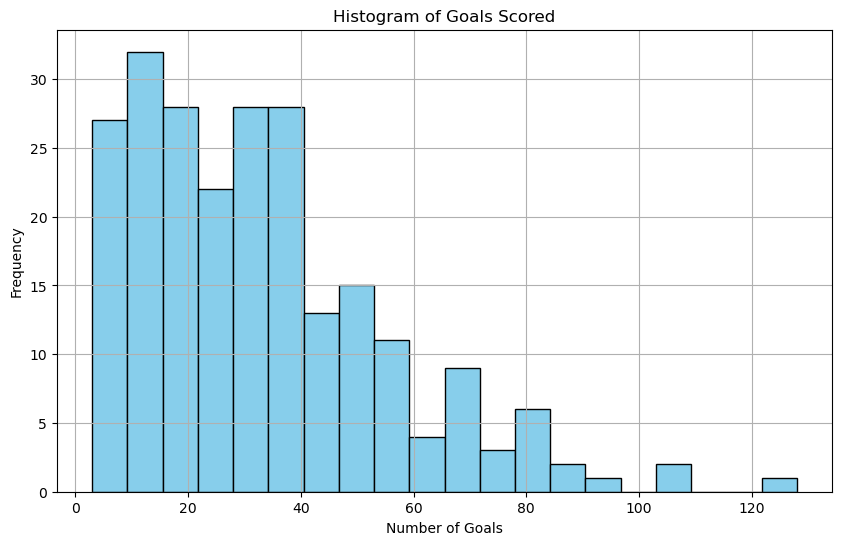

In [38]:
# Plot a histogram of goals scored
plt.figure(figsize=(10, 6))
plt.hist(df['Goals'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Goals Scored")
plt.xlabel("Number of Goals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()